In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
)
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
df = pd.read_csv("song_features.csv")
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350129,0.088772,0.130184,0.002828,1784.122641,129745.484419,2002.412407,85834.410406,3805.723030,9.012529e+05,...,52.424534,-1.687854,36.535866,-0.408730,41.603172,-2.302677,55.053654,1.222467,46.941353,blues
1,0.340849,0.094976,0.095908,0.002373,1530.261767,375915.508778,2038.987608,213905.103191,3550.713616,2.978311e+06,...,55.337963,-0.728403,60.231407,0.296872,48.133217,-0.282430,51.106014,0.530644,45.788696,blues
2,0.363538,0.085257,0.175473,0.002751,1552.832481,156471.010904,1747.754087,76295.413398,3042.410115,7.841309e+05,...,40.641678,-7.724840,47.629646,-1.819024,52.393597,-3.440458,46.643400,-2.238128,30.653150,blues
3,0.404854,0.093999,0.141040,0.006348,1070.153418,184366.009438,1596.422564,166551.844243,2184.879029,1.493078e+06,...,44.432903,-3.324069,50.218452,0.636311,37.325726,-0.615968,37.257774,-3.405046,31.965258,blues
4,0.308526,0.087843,0.091501,0.002305,1835.128513,343249.495746,1748.410758,88378.704478,3579.957471,1.572336e+06,...,85.995190,-5.451786,75.276740,-0.915952,53.633236,-4.408018,62.882492,-11.704385,55.190254,blues


In [8]:
X = df.drop(columns=["label"])
y = df["label"]

cols_to_drop = ["filename", "song_name", "artist", "track_id"]
X = X.drop(columns=[c for c in cols_to_drop if c in X.columns])

In [9]:
for col in X.columns:
    if X[col].dtype == "object":
        # quita corchetes y espacios, luego convierte a float
        X[col] = X[col].astype(str).str.replace("[", "", regex=False)\
                                   .str.replace("]", "", regex=False)\
                                   .str.strip()\
                                   .astype(float)

In [10]:
# 3. ENCODE DE ETIQUETAS
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
# 4. ESCALADO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# 5. TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.25,
    stratify=y_encoded,
    random_state=42,
)


In [13]:
# 6. CLASIFICADOR: EXTRA TREES
et = ExtraTreesClassifier(
    n_estimators=300,
    max_features="sqrt",
    random_state=42
)
et.fit(X_train, y_train)
pred_et = et.predict(X_test)

acc_et = accuracy_score(y_test, pred_et)
print("\n=== EXTRA TREES CLASSIFIER ===")
print("Accuracy:", acc_et)
print(classification_report(y_test, pred_et, target_names=le.classes_))


=== EXTRA TREES CLASSIFIER ===
Accuracy: 0.7574468085106383
              precision    recall  f1-score   support

       blues       0.83      0.71      0.76        34
   classical       0.87      0.97      0.92        35
     country       0.69      0.73      0.71        33
       disco       0.61      0.56      0.58        34
         pop       0.89      0.78      0.83        32
        rock       0.63      0.63      0.63        35
       salsa       0.79      0.94      0.86        32

    accuracy                           0.76       235
   macro avg       0.76      0.76      0.76       235
weighted avg       0.76      0.76      0.75       235



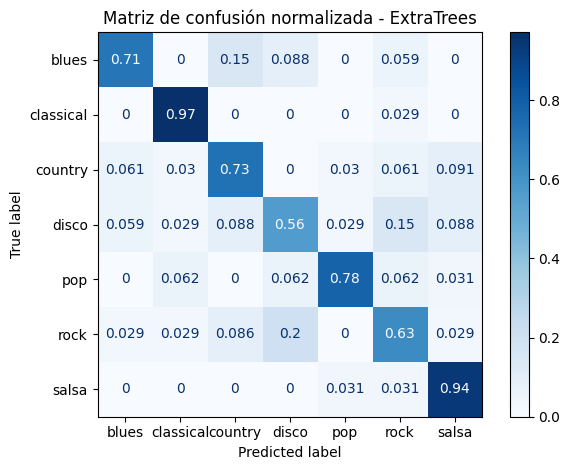

In [14]:
# 7. MATRIZ DE CONFUSIÓN NORMALIZADA
Disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    pred_et,
    display_labels=le.classes_,
    cmap="Blues",
    normalize="true",
)
plt.title("Matriz de confusión normalizada - ExtraTrees")
plt.tight_layout()
plt.show()

In [16]:
# 8. MÉTRICAS EN CUADRO
prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred_et, average=None)

df_metrics = pd.DataFrame({
    "Clase": le.classes_,
    "Precision": prec,
    "Recall": rec,
    "F1-Score": f1
})

print("\nMetricas por clase")
print(df_metrics)


Metricas por clase
       Clase  Precision    Recall  F1-Score
0      blues   0.827586  0.705882  0.761905
1  classical   0.871795  0.971429  0.918919
2    country   0.685714  0.727273  0.705882
3      disco   0.612903  0.558824  0.584615
4        pop   0.892857  0.781250  0.833333
5       rock   0.628571  0.628571  0.628571
6      salsa   0.789474  0.937500  0.857143
